In [1]:
import pandas as pd
import csv
import pandas as pd
import numpy as np
import nltk
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
tqdm.pandas()

from scipy.stats import ks_2samp
from IPython.core.display import display, HTML

In [2]:
information = pd.read_csv('question_nf_filename.txt', delimiter='|', encoding='utf-8')
information.columns = ['question_code', 'narrative_form','periodical_name']
information.columns = ['question_code', 'narrative_form','periodical_name']
information

,question_code,narrative_form,periodical_name
0,G01Q02,LB,1761-07-08_El-Duende-especulativo-sobre-la-vi...
1,G01Q03,EX,1761-09-05_El-Duende-especulativo-sobre-la-vi...
2,G01Q04,TR,1761-09-05_El-Duende-especulativo-sobre-la-vi...
3,G01Q05,FP,1761-09-26_El-Duende-especulativo-sobre-la-v...
4,G01Q06,??,1761-07-27_El-Duende-especulativo-sobre-la-vi...
...,...,...,...
268,G00Q266,MT,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-00...
269,G00Q267,MT,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-00...
270,G00Q268,FP,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-00...
271,G00Q269,MT,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-00...


In [3]:
emotion_gold_1 = pd.read_csv('surveys/emotion/gold_1.csv', delimiter=',', encoding='utf-8')
emotion_gold_1

,question_code,emotion_annotation,sentence
0,G01Q01,anger,"Mi pobre Vecino, posseìdo de una furiosa frene..."
1,G01Q05,joy,"Su tierno corazon, su espiritu admirable, su m..."
2,G01Q8,surprise,No es chanza: la mayor parte de los hombres no...
3,G01Q52,sadness,Y ha de saber Vm. que por la vanidad de estas ...
4,G01Q10,trust,"La lectura à que yo intento conduciros, solo p..."
...,...,...,...
58,G00Q126,sadness,Está capáz de entristecer à la compañia mas al...
59,G00Q127,sadness,Está capáz de entristecer à la compañia mas al...
60,G00Q131,joy,Es un Fenix entre los hombres.
61,G00Q132,joy,Es un Fenix entre los hombres.


In [4]:
polarity_gold_1 = pd.read_csv('surveys/polarity/gold_polarity_1.csv', delimiter=',', encoding='utf-8')
polarity_gold_1

,question_code,sentence,polarity_annotation
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",NEG
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",NEU
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,NEG
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",NEU
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",POS
...,...,...,...
119,G00Q132,Es un Fenix entre los hombres.,POS
120,G00Q133,"Pero todo esto es inutil, y èl ha hallado el m...",NEG
121,G00Q134,"Conociò su yerro, y procurò enmendarlo escribi...",NEG
122,G00Q135,El modo de quedar ayrosos les es muy facil.,NEG


In [5]:
gold_1 = pd.merge(polarity_gold_1, emotion_gold_1, on=['question_code','sentence'], how='outer')
gold_1

,question_code,sentence,polarity_annotation,emotion_annotation
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",NEG,anger
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",NEU,NaN
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,NEG,NaN
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",NEU,NaN
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",POS,joy
...,...,...,...,...
130,G01Q24,"ò lo que es mas cierto, es algun chusco de pri...",NaN,no emotion
131,G01Q27,La oferta no era friolera: asi fue llamado à u...,NaN,no emotion
132,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",NaN,no emotion
133,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,NaN,no emotion


In [6]:
gold_1[['polarity_annotation', 'emotion_annotation']] = gold_1[['polarity_annotation', 'emotion_annotation']].fillna('no_agreement')
gold_1

,question_code,sentence,polarity_annotation,emotion_annotation
0,G01Q01,"Mi pobre Vecino, posseìdo de una furiosa frene...",NEG,anger
1,G01Q02,"Continuamente la oygo decir à sus solas, y mas...",NEU,no_agreement
2,G01Q03,Matò à un Joven por haver murmurado de la cond...,NEG,no_agreement
3,G01Q04,"Pero no havia pisado sus umbrales, quando la D...",NEU,no_agreement
4,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",POS,joy
...,...,...,...,...
130,G01Q24,"ò lo que es mas cierto, es algun chusco de pri...",no_agreement,no emotion
131,G01Q27,La oferta no era friolera: asi fue llamado à u...,no_agreement,no emotion
132,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion
133,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion


In [7]:
polarity_gold_2 = pd.read_csv('surveys/polarity/gold_polarity_2.csv', delimiter=',', encoding='utf-8')
polarity_gold_2

,question_code,sentence,polarity_annotation
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG
1,G00Q137,"Miralos sin humanidad, y como esclavos, y ello...",NEG
2,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS
...,...,...,...
98,G00Q265,Nos quexamos continuamente de que nuestros dia...,NEG
99,G00Q267,"Los dos sexôs, y todos los estados de la repúb...",NEG
100,G00Q268,aplaude la buena educacion Francesa;,POS
101,G00Q269,"Si vmd. ama mas las alabanzas que el mérito, a...",NEU


In [8]:
gold = polarity_gold_2.append(gold_1)
gold

C:\Users\krusic\AppData\Local\Temp\ipykernel_32708\4011574393.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gold = polarity_gold_2.append(gold_1)


,question_code,sentence,polarity_annotation,emotion_annotation
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,NaN
1,G00Q137,"Miralos sin humanidad, y como esclavos, y ello...",NEG,NaN
2,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,NaN
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,NaN
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,NaN
...,...,...,...,...
130,G01Q24,"ò lo que es mas cierto, es algun chusco de pri...",no_agreement,no emotion
131,G01Q27,La oferta no era friolera: asi fue llamado à u...,no_agreement,no emotion
132,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion
133,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion


In [9]:
gold[ 'emotion_annotation'] = gold['emotion_annotation'].fillna('no_agreement')
gold

,question_code,sentence,polarity_annotation,emotion_annotation
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement
1,G00Q137,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement
2,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement
...,...,...,...,...
130,G01Q24,"ò lo que es mas cierto, es algun chusco de pri...",no_agreement,no emotion
131,G01Q27,La oferta no era friolera: asi fue llamado à u...,no_agreement,no emotion
132,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion
133,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion


In [10]:
information['question_code'] = information['question_code'].str.strip()
information['narrative_form'] = information['narrative_form'].str.strip()


In [11]:
df = pd.merge(gold, information, on='question_code', how='inner')
df

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...
1,G00Q137,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...
2,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...
...,...,...,...,...,...,...
234,G01Q58,Tiene un gabinete muy primoroso donde se retir...,no_agreement,no emotion,EX,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...
235,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",no_agreement,no emotion,MT,1803_El-Regañón-general_Anónimo-(Ventura-Ferr...
236,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion,S,1781_El-Censor_Anonym-(García-de-Cañuelo-Luis+...
237,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion,LB,1786-1788_El-Corresponsal-del-Censor_Anónimo_V...


In [12]:
e_no_agreement = df['emotion_annotation'].value_counts().get('no_agreement', 0)
p_no_agreement = df['polarity_annotation'].value_counts().get('no_agreement', 0)

print(f'Polarity:{p_no_agreement}, emotion:{e_no_agreement}')

Polarity:11, emotion:178


# Pysentimiento (sentiment)

In [13]:
!pip install pysentimiento

In [14]:
from pysentimiento import create_analyzer

In [15]:
analyzer = create_analyzer (task='sentiment', lang='es')

In [16]:
df['sentiment_pysentimiento'] = analyzer.predict(df['sentence'])


Map:   0%|          | 0/239 [00:00<?, ? examples/s]

In [17]:
df

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,..."
1,G00Q137,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,..."
2,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,..."
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,..."
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,..."
...,...,...,...,...,...,...,...
234,G01Q58,Tiene un gabinete muy primoroso donde se retir...,no_agreement,no emotion,EX,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...,"AnalyzerOutput(output=POS, probas={POS: 0.836,..."
235,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",no_agreement,no emotion,MT,1803_El-Regañón-general_Anónimo-(Ventura-Ferr...,"AnalyzerOutput(output=NEU, probas={NEU: 0.626,..."
236,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion,S,1781_El-Censor_Anonym-(García-de-Cañuelo-Luis+...,"AnalyzerOutput(output=NEG, probas={NEG: 0.722,..."
237,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion,LB,1786-1788_El-Corresponsal-del-Censor_Anónimo_V...,"AnalyzerOutput(output=NEG, probas={NEG: 0.653,..."


In [18]:
df["sentence"]=df["sentence"]. apply(str) 

# Pysentimiento (emotion)


In [19]:
emotion_analyzer = create_analyzer(task="emotion", lang="es")

In [20]:
df['emotion_pysentimiento'] = emotion_analyzer.predict(df['sentence'])


Map:   0%|          | 0/239 [00:00<?, ? examples/s]

In [21]:
df


,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0...."
1,G00Q137,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0...."
2,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,...","AnalyzerOutput(output=others, probas={others: ..."
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,...","AnalyzerOutput(output=joy, probas={joy: 0.552,..."
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,...","AnalyzerOutput(output=others, probas={others: ..."
...,...,...,...,...,...,...,...,...
234,G01Q58,Tiene un gabinete muy primoroso donde se retir...,no_agreement,no emotion,EX,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...,"AnalyzerOutput(output=POS, probas={POS: 0.836,...","AnalyzerOutput(output=others, probas={others: ..."
235,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",no_agreement,no emotion,MT,1803_El-Regañón-general_Anónimo-(Ventura-Ferr...,"AnalyzerOutput(output=NEU, probas={NEU: 0.626,...","AnalyzerOutput(output=others, probas={others: ..."
236,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion,S,1781_El-Censor_Anonym-(García-de-Cañuelo-Luis+...,"AnalyzerOutput(output=NEG, probas={NEG: 0.722,...","AnalyzerOutput(output=anger, probas={anger: 0...."
237,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion,LB,1786-1788_El-Corresponsal-del-Censor_Anónimo_V...,"AnalyzerOutput(output=NEG, probas={NEG: 0.653,...","AnalyzerOutput(output=sadness, probas={sadness..."


# Sentiment lexicon

In [22]:
language = "spanish"

dictionary_dir = "dictionaries/manual/"
dictionaryCorr = "dictionaries/computational_corrected/"
dictionaryComp = "dictionaries/computational/"

MAnual

In [23]:
sentiment_dict = {}
with open("{}{}_negative.txt".format(dictionary_dir, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["neg"] = fr.read().splitlines()
with open("{}{}_positive.txt".format(dictionary_dir, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["pos"] = fr.read().splitlines()

print("loaded {} negative words".format(len(sentiment_dict["neg"])))
print("loaded {} positive words".format(len(sentiment_dict["pos"])))

loaded 798 negative words
loaded 681 positive words


In [24]:
def compute_sentiment(text):
    tokens = nltk.word_tokenize(text)
    tokens = [t.lower() for t in tokens]
    num_negative = 0
    num_positive = 0
    for nw in sentiment_dict["neg"]:
        num_negative += tokens.count(nw.lower())
    for pw in sentiment_dict["pos"]:
        num_positive += tokens.count(pw.lower())
    try:
        sentiment_score = (num_positive - num_negative) / (num_positive + num_negative)
    except ZeroDivisionError:
        sentiment_score = 0
    return sentiment_score

In [25]:
df["nf_sentiment_lexicon_dispecs"] = df["sentence"].progress_apply(compute_sentiment)

  0%|          | 0/239 [00:00<?, ?it/s]

Computational

In [26]:
sentiment_dict = {}
with open("{}{}_negative.txt".format(dictionaryComp, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["neg"] = fr.read().splitlines()
with open("{}{}_positive.txt".format(dictionaryComp, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["pos"] = fr.read().splitlines()

print("loaded {} negative words".format(len(sentiment_dict["neg"])))
print("loaded {} positive words".format(len(sentiment_dict["pos"])))

loaded 691 negative words
loaded 1034 positive words


In [27]:
df["nf_sentiment_lexicon_computational"] = df["sentence"].progress_apply(compute_sentiment)

  0%|          | 0/239 [00:00<?, ?it/s]

Corrected dictionary

In [28]:
sentiment_dict = {}
with open("{}{}_negative.txt".format(dictionaryCorr, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["neg"] = fr.read().splitlines()
with open("{}{}_positive.txt".format(dictionaryCorr, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["pos"] = fr.read().splitlines()

print("loaded {} negative words".format(len(sentiment_dict["neg"])))
print("loaded {} positive words".format(len(sentiment_dict["pos"])))

loaded 812 negative words
loaded 692 positive words


In [29]:
df["nf_sentiment_lexicon_corrected"] = df["sentence"].progress_apply(compute_sentiment)

  0%|          | 0/239 [00:00<?, ?it/s]

# Emotion lexicon

In [30]:
new_dictionary_dir = "dictionaries/emotion/"

emotion_dict = {}
with open(new_dictionary_dir + "anger.txt", "r", encoding="utf-8") as em:
    emotion_dict["anger"] = em.read().splitlines()
with open(new_dictionary_dir + "disgust.txt", "r", encoding="utf-8") as em:
    emotion_dict["disgust"] = em.read().splitlines()
with open(new_dictionary_dir + "joy.txt", "r", encoding="utf-8") as em:
    emotion_dict["joy"] = em.read().splitlines()
with open(new_dictionary_dir + "fear.txt", "r", encoding="utf-8") as em:
    emotion_dict["fear"] = em.read().splitlines()
with open(new_dictionary_dir + "sadness.txt", "r", encoding="utf-8") as em:
    emotion_dict["sadness"] = em.read().splitlines()
with open(new_dictionary_dir +"surprise.txt", "r", encoding="utf-8") as em:
    emotion_dict["surprise"] = em.read().splitlines()
    

print("loaded {} anger words".format(len(emotion_dict["anger"])))
print("loaded {} disgust words".format(len(emotion_dict["disgust"])))
print("loaded {} joy words".format(len(emotion_dict["joy"])))
print("loaded {} fear words".format(len(emotion_dict["fear"])))
print("loaded {} sadness words".format(len(emotion_dict["sadness"])))
print("loaded {} surprise words".format(len(emotion_dict["surprise"])))

loaded 382 anger words
loaded 209 disgust words
loaded 668 joy words
loaded 211 fear words
loaded 391 sadness words
loaded 175 surprise words


In [31]:
def one_emotion(text):
    tokens = nltk.word_tokenize(text)
    tokens = [t.lower() for t in tokens]
    num_anger = 0
    num_disgust = 0
    num_joy = 0
    num_fear = 0
    num_sadness = 0
    num_surprise = 0
    for anger in emotion_dict["anger"]:
        num_anger += tokens.count(anger.lower())
    for disgust in emotion_dict["disgust"]:
        num_disgust += tokens.count(disgust.lower())
    for joy in emotion_dict["joy"]:
        num_joy += tokens.count(joy.lower())
    for fear in emotion_dict["fear"]:
        num_fear += tokens.count(fear.lower())
    for sadness in emotion_dict["sadness"]:
        num_sadness += tokens.count(sadness.lower())
    for surprise in emotion_dict["surprise"]:
        num_surprise += tokens.count(surprise.lower())
    try:
        emotion_score = {'anger' : num_anger,'joy' : num_joy,'disgust' : num_disgust,'fear': num_fear, 'sadness': num_sadness, 'surprise':num_surprise}
        emotion = max(emotion_score, key=emotion_score.get)

    except:
        print("Something went wrong")
    if all(value == 0 for value in emotion_score.values()):
        return ("others")
    else:
        return emotion

In [32]:
df["lexicon_emotion"] = df["sentence"].progress_apply(one_emotion)

  0%|          | 0/239 [00:00<?, ?it/s]

In [33]:
df

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,lexicon_emotion
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy
1,G00Q137,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy
2,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,others
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,...","AnalyzerOutput(output=joy, probas={joy: 0.552,...",1.000000,1.000000,1.000000,joy
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,joy
...,...,...,...,...,...,...,...,...,...,...,...,...
234,G01Q58,Tiene un gabinete muy primoroso donde se retir...,no_agreement,no emotion,EX,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...,"AnalyzerOutput(output=POS, probas={POS: 0.836,...","AnalyzerOutput(output=others, probas={others: ...",0.000000,0.000000,0.000000,others
235,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",no_agreement,no emotion,MT,1803_El-Regañón-general_Anónimo-(Ventura-Ferr...,"AnalyzerOutput(output=NEU, probas={NEU: 0.626,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,sadness
236,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion,S,1781_El-Censor_Anonym-(García-de-Cañuelo-Luis+...,"AnalyzerOutput(output=NEG, probas={NEG: 0.722,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.600000,0.666667,0.600000,sadness
237,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion,LB,1786-1788_El-Corresponsal-del-Censor_Anónimo_V...,"AnalyzerOutput(output=NEG, probas={NEG: 0.653,...","AnalyzerOutput(output=sadness, probas={sadness...",0.333333,0.333333,0.333333,anger


# Making nicer columns (please make sure how to run) - change column_name

In [34]:
def change_values(row):
        if row == 0.000000 :    
            return 'NEU'
        elif row > 0.000000:  
            return 'POS'
        elif row < 0.000000:  
            return 'NEG'
        else:          
            return 'error'

In [35]:
df['manual_lexicon_sent_score'] = df['nf_sentiment_lexicon_dispecs'].apply(change_values)


In [36]:
df['comp_lexicon_sent_score'] = df['nf_sentiment_lexicon_computational'].apply(change_values)

In [37]:
df['corr_lexicon_sent_score'] = df['nf_sentiment_lexicon_corrected'].apply(change_values)

In [38]:
df

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,lexicon_emotion,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU
1,G00Q137,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU
2,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,others,POS,POS,POS
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,...","AnalyzerOutput(output=joy, probas={joy: 0.552,...",1.000000,1.000000,1.000000,joy,POS,POS,POS
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,joy,POS,POS,POS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,G01Q58,Tiene un gabinete muy primoroso donde se retir...,no_agreement,no emotion,EX,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...,"AnalyzerOutput(output=POS, probas={POS: 0.836,...","AnalyzerOutput(output=others, probas={others: ...",0.000000,0.000000,0.000000,others,NEU,NEU,NEU
235,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",no_agreement,no emotion,MT,1803_El-Regañón-general_Anónimo-(Ventura-Ferr...,"AnalyzerOutput(output=NEU, probas={NEU: 0.626,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,sadness,POS,POS,POS
236,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion,S,1781_El-Censor_Anonym-(García-de-Cañuelo-Luis+...,"AnalyzerOutput(output=NEG, probas={NEG: 0.722,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.600000,0.666667,0.600000,sadness,POS,POS,POS
237,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion,LB,1786-1788_El-Corresponsal-del-Censor_Anónimo_V...,"AnalyzerOutput(output=NEG, probas={NEG: 0.653,...","AnalyzerOutput(output=sadness, probas={sadness...",0.333333,0.333333,0.333333,anger,POS,POS,POS


In [39]:
df['sentiment_pysentimiento'] = df['sentiment_pysentimiento'].astype('string')
df['emotion_pysentimiento'] = df['emotion_pysentimiento'].astype('string')


In [40]:
def extract_output(value):
    start_idx = value.find("output=") + len("output=")
    end_idx = value.find(", probas")
    return value[start_idx:end_idx]

In [41]:
df['sentiment_py'] = df['sentiment_pysentimiento'].apply(extract_output)
df['emotion_py'] = df['emotion_pysentimiento'].apply(extract_output)


In [42]:
df

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,lexicon_emotion,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py,emotion_py
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU,NEG,anger
1,G00Q137,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU,NEG,anger
2,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,others,POS,POS,POS,NEG,others
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,...","AnalyzerOutput(output=joy, probas={joy: 0.552,...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,joy
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,G01Q58,Tiene un gabinete muy primoroso donde se retir...,no_agreement,no emotion,EX,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...,"AnalyzerOutput(output=POS, probas={POS: 0.836,...","AnalyzerOutput(output=others, probas={others: ...",0.000000,0.000000,0.000000,others,NEU,NEU,NEU,POS,others
235,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",no_agreement,no emotion,MT,1803_El-Regañón-general_Anónimo-(Ventura-Ferr...,"AnalyzerOutput(output=NEU, probas={NEU: 0.626,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,sadness,POS,POS,POS,NEU,others
236,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion,S,1781_El-Censor_Anonym-(García-de-Cañuelo-Luis+...,"AnalyzerOutput(output=NEG, probas={NEG: 0.722,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.600000,0.666667,0.600000,sadness,POS,POS,POS,NEG,anger
237,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion,LB,1786-1788_El-Corresponsal-del-Censor_Anónimo_V...,"AnalyzerOutput(output=NEG, probas={NEG: 0.653,...","AnalyzerOutput(output=sadness, probas={sadness...",0.333333,0.333333,0.333333,anger,POS,POS,POS,NEG,sadness


In [43]:
len(df)

239

In [44]:
df.to_pickle('sentences_sentiment_emotion.pk')


In [45]:
df = df.drop_duplicates()


In [46]:
len(df)

238

In [47]:
df

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,lexicon_emotion,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py,emotion_py
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU,NEG,anger
1,G00Q137,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU,NEG,anger
2,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,others,POS,POS,POS,NEG,others
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,...","AnalyzerOutput(output=joy, probas={joy: 0.552,...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,joy
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,G01Q58,Tiene un gabinete muy primoroso donde se retir...,no_agreement,no emotion,EX,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...,"AnalyzerOutput(output=POS, probas={POS: 0.836,...","AnalyzerOutput(output=others, probas={others: ...",0.000000,0.000000,0.000000,others,NEU,NEU,NEU,POS,others
235,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",no_agreement,no emotion,MT,1803_El-Regañón-general_Anónimo-(Ventura-Ferr...,"AnalyzerOutput(output=NEU, probas={NEU: 0.626,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,sadness,POS,POS,POS,NEU,others
236,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion,S,1781_El-Censor_Anonym-(García-de-Cañuelo-Luis+...,"AnalyzerOutput(output=NEG, probas={NEG: 0.722,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.600000,0.666667,0.600000,sadness,POS,POS,POS,NEG,anger
237,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion,LB,1786-1788_El-Corresponsal-del-Censor_Anónimo_V...,"AnalyzerOutput(output=NEG, probas={NEG: 0.653,...","AnalyzerOutput(output=sadness, probas={sadness...",0.333333,0.333333,0.333333,anger,POS,POS,POS,NEG,sadness


In [48]:
df_new = df.drop_duplicates(subset=['sentence', 'polarity_annotation'])


In [49]:
len(df_new)

229

In [50]:
df_new

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,lexicon_emotion,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py,emotion_py
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU,NEG,anger
2,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,others,POS,POS,POS,NEG,others
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,...","AnalyzerOutput(output=joy, probas={joy: 0.552,...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,joy
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,others
5,G00Q141,Confiesso à Vm. que yá no puedo sufrir la vida...,NEG,no_agreement,SP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.717,...","AnalyzerOutput(output=sadness, probas={sadness...",-0.333333,0.333333,-0.333333,sadness,NEG,POS,NEG,NEG,sadness
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,G01Q58,Tiene un gabinete muy primoroso donde se retir...,no_agreement,no emotion,EX,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...,"AnalyzerOutput(output=POS, probas={POS: 0.836,...","AnalyzerOutput(output=others, probas={others: ...",0.000000,0.000000,0.000000,others,NEU,NEU,NEU,POS,others
235,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",no_agreement,no emotion,MT,1803_El-Regañón-general_Anónimo-(Ventura-Ferr...,"AnalyzerOutput(output=NEU, probas={NEU: 0.626,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,sadness,POS,POS,POS,NEU,others
236,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion,S,1781_El-Censor_Anonym-(García-de-Cañuelo-Luis+...,"AnalyzerOutput(output=NEG, probas={NEG: 0.722,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.600000,0.666667,0.600000,sadness,POS,POS,POS,NEG,anger
237,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion,LB,1786-1788_El-Corresponsal-del-Censor_Anónimo_V...,"AnalyzerOutput(output=NEG, probas={NEG: 0.653,...","AnalyzerOutput(output=sadness, probas={sadness...",0.333333,0.333333,0.333333,anger,POS,POS,POS,NEG,sadness


In [51]:
df.to_pickle('new_sentences.pk')


# Adding GPT

In [52]:
gpt_polarity = pd.read_csv('surveys/GPT/GPT4_default.csv', delimiter=';', encoding='utf-8')
gpt_polarity 

,ID,Sentence,GPT,Explanation
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",Negative,"References to ""sin humanidad"" (without humanit..."
1,G00Q137,"Miralos sin humanidad, y como esclavos, y ello...",Negative,Same as above.
2,G00Q138,No es tan facil determinar por dónde se ha de ...,Neutral,Statement about the challenge of determining t...
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",Positive,"References to ""ternura"" (tenderness), ""cuidado..."
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",Positive,"Reference to ""tranquilo"" (calm) and living fre..."
...,...,...,...,...
233,G01Q58,Tiene un gabinete muy primoroso donde se retir...,Positive,Describes a lovely cabinet and mentions compos...
234,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",Negative,"Describes needing courage to reread a letter, ..."
235,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",Negative,Suggests that malicious people might have inve...
236,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,Neutral,While it mentions the displeasure regarding un...


In [53]:
gpt_polarity.drop_duplicates(subset=['Sentence', 'GPT'], inplace=True)


In [54]:
gpt_polarity 

,ID,Sentence,GPT,Explanation
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",Negative,"References to ""sin humanidad"" (without humanit..."
2,G00Q138,No es tan facil determinar por dónde se ha de ...,Neutral,Statement about the challenge of determining t...
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",Positive,"References to ""ternura"" (tenderness), ""cuidado..."
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",Positive,"Reference to ""tranquilo"" (calm) and living fre..."
5,G00Q141,Confiesso à Vm. que yá no puedo sufrir la vida...,Negative,"The use of ""no puedo sufrir"" (I can't bear) an..."
...,...,...,...,...
233,G01Q58,Tiene un gabinete muy primoroso donde se retir...,Positive,Describes a lovely cabinet and mentions compos...
234,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",Negative,"Describes needing courage to reread a letter, ..."
235,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",Negative,Suggests that malicious people might have inve...
236,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,Neutral,While it mentions the displeasure regarding un...


In [55]:
gpt_polarity.drop_duplicates(inplace=True)


In [56]:
len(gpt_polarity)

209

In [57]:
gpt_polarity

,ID,Sentence,GPT,Explanation
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",Negative,"References to ""sin humanidad"" (without humanit..."
2,G00Q138,No es tan facil determinar por dónde se ha de ...,Neutral,Statement about the challenge of determining t...
3,G00Q139,"Tù debes acordarte de la ternura, con que se p...",Positive,"References to ""ternura"" (tenderness), ""cuidado..."
4,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",Positive,"Reference to ""tranquilo"" (calm) and living fre..."
5,G00Q141,Confiesso à Vm. que yá no puedo sufrir la vida...,Negative,"The use of ""no puedo sufrir"" (I can't bear) an..."
...,...,...,...,...
233,G01Q58,Tiene un gabinete muy primoroso donde se retir...,Positive,Describes a lovely cabinet and mentions compos...
234,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",Negative,"Describes needing courage to reread a letter, ..."
235,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",Negative,Suggests that malicious people might have inve...
236,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,Neutral,While it mentions the displeasure regarding un...


In [58]:
gpt_polarity.drop(['Explanation','Sentence'], axis=1, inplace=True)


In [59]:
gpt_polarity.rename(columns={'ID': 'question_code'}, inplace=True)


In [60]:
df = pd.merge(df_new, gpt_polarity, on='question_code', how='outer')
df

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,lexicon_emotion,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py,emotion_py,GPT
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU,NEG,anger,Negative
1,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,others,POS,POS,POS,NEG,others,Neutral
2,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,...","AnalyzerOutput(output=joy, probas={joy: 0.552,...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,joy,Positive
3,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,others,Positive
4,G00Q141,Confiesso à Vm. que yá no puedo sufrir la vida...,NEG,no_agreement,SP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.717,...","AnalyzerOutput(output=sadness, probas={sadness...",-0.333333,0.333333,-0.333333,sadness,NEG,POS,NEG,NEG,sadness,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",no_agreement,no emotion,MT,1803_El-Regañón-general_Anónimo-(Ventura-Ferr...,"AnalyzerOutput(output=NEU, probas={NEU: 0.626,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,sadness,POS,POS,POS,NEU,others,Negative
226,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion,S,1781_El-Censor_Anonym-(García-de-Cañuelo-Luis+...,"AnalyzerOutput(output=NEG, probas={NEG: 0.722,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.600000,0.666667,0.600000,sadness,POS,POS,POS,NEG,anger,Negative
227,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion,LB,1786-1788_El-Corresponsal-del-Censor_Anónimo_V...,"AnalyzerOutput(output=NEG, probas={NEG: 0.653,...","AnalyzerOutput(output=sadness, probas={sadness...",0.333333,0.333333,0.333333,anger,POS,POS,POS,NEG,sadness,Neutral
228,G00Q111,"Rióse el amigo, oyendo los despropositos del O...",no_agreement,no emotion,D,1761-06-13_El-Duende-especulativo-sobre-la-vid...,"AnalyzerOutput(output=NEU, probas={NEU: 0.542,...","AnalyzerOutput(output=others, probas={others: ...",0.500000,1.000000,0.500000,joy,POS,POS,POS,NEU,others,Neutral


In [61]:
df.dropna(subset=['sentence'], inplace=True)


In [62]:
df

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,lexicon_emotion,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py,emotion_py,GPT
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU,NEG,anger,Negative
1,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,others,POS,POS,POS,NEG,others,Neutral
2,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,...","AnalyzerOutput(output=joy, probas={joy: 0.552,...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,joy,Positive
3,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,others,Positive
4,G00Q141,Confiesso à Vm. que yá no puedo sufrir la vida...,NEG,no_agreement,SP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.717,...","AnalyzerOutput(output=sadness, probas={sadness...",-0.333333,0.333333,-0.333333,sadness,NEG,POS,NEG,NEG,sadness,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,G01Q58,Tiene un gabinete muy primoroso donde se retir...,no_agreement,no emotion,EX,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...,"AnalyzerOutput(output=POS, probas={POS: 0.836,...","AnalyzerOutput(output=others, probas={others: ...",0.000000,0.000000,0.000000,others,NEU,NEU,NEU,POS,others,Positive
225,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",no_agreement,no emotion,MT,1803_El-Regañón-general_Anónimo-(Ventura-Ferr...,"AnalyzerOutput(output=NEU, probas={NEU: 0.626,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,sadness,POS,POS,POS,NEU,others,Negative
226,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion,S,1781_El-Censor_Anonym-(García-de-Cañuelo-Luis+...,"AnalyzerOutput(output=NEG, probas={NEG: 0.722,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.600000,0.666667,0.600000,sadness,POS,POS,POS,NEG,anger,Negative
227,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion,LB,1786-1788_El-Corresponsal-del-Censor_Anónimo_V...,"AnalyzerOutput(output=NEG, probas={NEG: 0.653,...","AnalyzerOutput(output=sadness, probas={sadness...",0.333333,0.333333,0.333333,anger,POS,POS,POS,NEG,sadness,Neutral


In [63]:
df['GPT'] = df['GPT'].replace(['Positive','Negative','Neutral', 'Mixed'],['POS','NEG','NEU','no_agreement'])


In [64]:
df['GPT'].fillna('no_agreement', inplace=True)


In [65]:
df

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,lexicon_emotion,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py,emotion_py,GPT
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU,NEG,anger,NEG
1,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,others,POS,POS,POS,NEG,others,NEU
2,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,...","AnalyzerOutput(output=joy, probas={joy: 0.552,...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,joy,POS
3,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,others,POS
4,G00Q141,Confiesso à Vm. que yá no puedo sufrir la vida...,NEG,no_agreement,SP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.717,...","AnalyzerOutput(output=sadness, probas={sadness...",-0.333333,0.333333,-0.333333,sadness,NEG,POS,NEG,NEG,sadness,NEG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,G01Q58,Tiene un gabinete muy primoroso donde se retir...,no_agreement,no emotion,EX,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...,"AnalyzerOutput(output=POS, probas={POS: 0.836,...","AnalyzerOutput(output=others, probas={others: ...",0.000000,0.000000,0.000000,others,NEU,NEU,NEU,POS,others,POS
225,G01Q70,"Pero en obsequio de la verdad debo decir, que ...",no_agreement,no emotion,MT,1803_El-Regañón-general_Anónimo-(Ventura-Ferr...,"AnalyzerOutput(output=NEU, probas={NEU: 0.626,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,sadness,POS,POS,POS,NEU,others,NEG
226,G01Q28,"Apostaré algo de bueno, à que algun artificio ...",no_agreement,no emotion,S,1781_El-Censor_Anonym-(García-de-Cañuelo-Luis+...,"AnalyzerOutput(output=NEG, probas={NEG: 0.722,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.600000,0.666667,0.600000,sadness,POS,POS,POS,NEG,anger,NEG
227,G00Q73,Mi amiga me ha dicho que Vm. no gusta de las M...,no_agreement,no emotion,LB,1786-1788_El-Corresponsal-del-Censor_Anónimo_V...,"AnalyzerOutput(output=NEG, probas={NEG: 0.653,...","AnalyzerOutput(output=sadness, probas={sadness...",0.333333,0.333333,0.333333,anger,POS,POS,POS,NEG,sadness,NEU


In [66]:
df.to_pickle('new_sentences_gpt.pk')


# Calculating accuracy

https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec

In [67]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Dropping all rows that have 'no_agreement' in the sentiment column

In [68]:
df_sentiment = df[df["polarity_annotation"] != 'no_agreement']


In [69]:
len(df_sentiment)

218

We now have 218 sentences in our corpus

In [70]:
df_sentiment

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,lexicon_emotion,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py,emotion_py,GPT
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,0.000000,joy,NEU,NEU,NEU,NEG,anger,NEG
1,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,others,POS,POS,POS,NEG,others,NEU
2,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,...","AnalyzerOutput(output=joy, probas={joy: 0.552,...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,joy,POS
3,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,others,POS
4,G00Q141,Confiesso à Vm. que yá no puedo sufrir la vida...,NEG,no_agreement,SP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.717,...","AnalyzerOutput(output=sadness, probas={sadness...",-0.333333,0.333333,-0.333333,sadness,NEG,POS,NEG,NEG,sadness,NEG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,G00Q131,Es un Fenix entre los hombres.,POS,joy,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEU, probas={NEU: 0.514,...","AnalyzerOutput(output=others, probas={others: ...",0.000000,0.000000,0.000000,others,NEU,NEU,NEU,NEU,others,POS
220,G00Q133,"Pero todo esto es inutil, y èl ha hallado el m...",NEG,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.962,...","AnalyzerOutput(output=anger, probas={anger: 0....",-0.600000,-0.600000,-0.600000,others,NEG,NEG,NEG,NEG,anger,NEG
221,G00Q134,"Conociò su yerro, y procurò enmendarlo escribi...",NEG,sadness,EX,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEU, probas={NEU: 0.493,...","AnalyzerOutput(output=others, probas={others: ...",-1.000000,-1.000000,-1.000000,others,NEG,NEG,NEG,NEU,others,NEG
222,G00Q135,El modo de quedar ayrosos les es muy facil.,NEG,no_agreement,EX,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.838,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,surprise,POS,POS,POS,NEG,others,POS


In [71]:
df_sentiment['sentiment_annotation_list'] = df_sentiment['polarity_annotation'].replace(['POS','NEG','NEU'],['1','3','2'])



C:\Users\krusic\AppData\Local\Temp\ipykernel_32708\2839398342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['sentiment_annotation_list'] = df_sentiment['polarity_annotation'].replace(['POS','NEG','NEU'],['1','3','2'])


In [72]:
df_sentiment['sentiment_py_list'] = df_sentiment['sentiment_py'].replace(['POS','NEG','NEU'],['1','3','2'])

C:\Users\krusic\AppData\Local\Temp\ipykernel_32708\3381453953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['sentiment_py_list'] = df_sentiment['sentiment_py'].replace(['POS','NEG','NEU'],['1','3','2'])


In [73]:
df_sentiment['corr_lexicon_sent_score_list'] = df_sentiment['corr_lexicon_sent_score'].replace(['POS','NEG','NEU'],['1','3','2'])


C:\Users\krusic\AppData\Local\Temp\ipykernel_32708\1259448734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['corr_lexicon_sent_score_list'] = df_sentiment['corr_lexicon_sent_score'].replace(['POS','NEG','NEU'],['1','3','2'])


In [74]:
df_sentiment['manual_lexicon_sent_score_list'] = df_sentiment['manual_lexicon_sent_score'].replace(['POS','NEG','NEU'],['1','3','2'])


C:\Users\krusic\AppData\Local\Temp\ipykernel_32708\3731824705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['manual_lexicon_sent_score_list'] = df_sentiment['manual_lexicon_sent_score'].replace(['POS','NEG','NEU'],['1','3','2'])


In [75]:
df_sentiment['computational_lexicon_sent_score_list'] = df_sentiment['comp_lexicon_sent_score'].replace(['POS','NEG','NEU'],['1','3','2'])


C:\Users\krusic\AppData\Local\Temp\ipykernel_32708\2301282570.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiment['computational_lexicon_sent_score_list'] = df_sentiment['comp_lexicon_sent_score'].replace(['POS','NEG','NEU'],['1','3','2'])


In [76]:
df_sentiment

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,...,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py,emotion_py,GPT,sentiment_annotation_list,sentiment_py_list,corr_lexicon_sent_score_list,manual_lexicon_sent_score_list,computational_lexicon_sent_score_list
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,...,NEU,NEU,NEG,anger,NEG,3,3,2,2,2
1,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,...,POS,POS,NEG,others,NEU,2,3,1,1,1
2,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,...","AnalyzerOutput(output=joy, probas={joy: 0.552,...",1.000000,1.000000,...,POS,POS,POS,joy,POS,1,1,1,1,1
3,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,...,POS,POS,POS,others,POS,1,1,1,1,1
4,G00Q141,Confiesso à Vm. que yá no puedo sufrir la vida...,NEG,no_agreement,SP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.717,...","AnalyzerOutput(output=sadness, probas={sadness...",-0.333333,0.333333,...,POS,NEG,NEG,sadness,NEG,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,G00Q131,Es un Fenix entre los hombres.,POS,joy,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEU, probas={NEU: 0.514,...","AnalyzerOutput(output=others, probas={others: ...",0.000000,0.000000,...,NEU,NEU,NEU,others,POS,1,2,2,2,2
220,G00Q133,"Pero todo esto es inutil, y èl ha hallado el m...",NEG,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.962,...","AnalyzerOutput(output=anger, probas={anger: 0....",-0.600000,-0.600000,...,NEG,NEG,NEG,anger,NEG,3,3,3,3,3
221,G00Q134,"Conociò su yerro, y procurò enmendarlo escribi...",NEG,sadness,EX,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEU, probas={NEU: 0.493,...","AnalyzerOutput(output=others, probas={others: ...",-1.000000,-1.000000,...,NEG,NEG,NEU,others,NEG,3,2,3,3,3
222,G00Q135,El modo de quedar ayrosos les es muy facil.,NEG,no_agreement,EX,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.838,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,...,POS,POS,NEG,others,POS,3,3,1,1,1


In [77]:
sentiment_annotation_list = df_sentiment['sentiment_annotation_list'].tolist()
print(sentiment_annotation_list)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '1', '3', '3', '2', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '3', '3', '2', '3', '1', '3', '3', '2', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '3', '3', '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '1', '3', '3', '3', '3', '3', '3', '3', '2', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '1', '3', '1', '3', '3', '2',

In [78]:
sentiment_py_list = df_sentiment['sentiment_py_list'].tolist()
print(sentiment_py_list)

['3', '3', '1', '1', '3', '2', '2', '3', '3', '2', '1', '3', '3', '2', '3', '3', '3', '3', '3', '1', '3', '1', '2', '3', '3', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '1', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '3', '3', '1', '3', '3', '3', '3', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '2', '3', '3', '3', '2', '1', '2', '3', '2', '3', '3', '1', '1', '2', '1', '2', '3', '2', '3', '1', '2', '3', '2', '1', '3', '3', '2', '3', '3', '1', '3', '2', '3', '3', '3', '2', '3', '1', '3', '3', '3', '2', '1', '3', '3', '3', '2', '3', '3', '1', '3', '3', '2', '1', '1', '3', '2', '2', '2', '3', '1', '2', '3', '2', '3', '2', '3', '2', '2', '2', '3', '3', '2', '3', '1', '3', '3', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '2', '2', '3', '2', '1', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '3', '3', '3', '1', '2', '3', '3', '2', '3', '3',

In [79]:
corr_lexicon_sent_score_list = df_sentiment['corr_lexicon_sent_score_list'].tolist()
print(corr_lexicon_sent_score_list)

['2', '1', '1', '1', '3', '1', '3', '2', '2', '2', '1', '3', '3', '1', '1', '3', '3', '3', '3', '1', '1', '1', '2', '1', '1', '1', '3', '1', '2', '2', '3', '3', '3', '3', '1', '3', '2', '1', '1', '1', '3', '3', '3', '3', '1', '1', '3', '2', '1', '1', '1', '3', '1', '1', '1', '1', '1', '3', '1', '2', '2', '3', '2', '2', '3', '1', '3', '2', '3', '3', '3', '3', '2', '2', '1', '2', '2', '3', '1', '1', '3', '3', '3', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '1', '2', '2', '1', '1', '1', '1', '2', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '3', '2', '1', '1', '2', '3', '2', '2', '1', '1', '1', '2', '1', '3', '2', '1', '3', '2', '2', '3', '3', '1', '1', '3', '1', '1', '2', '1', '2', '2', '1', '1', '1', '1', '1', '1', '3', '2', '2', '1', '1', '1', '2', '3', '3', '3', '1', '1', '1', '1', '3', '2', '1', '1', '1', '3', '1', '3', '1', '3', '3', '2', '3', '3', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '1', '2', '1', '2', '1', '1', '1', '3', '2', '1', '2', '3', '1',

In [80]:
manual_lexicon_sent_score_list = df_sentiment['manual_lexicon_sent_score_list'].tolist()
print(manual_lexicon_sent_score_list)

['2', '1', '1', '1', '3', '1', '3', '2', '2', '2', '1', '3', '3', '1', '1', '3', '3', '3', '3', '1', '1', '1', '2', '1', '1', '1', '3', '1', '2', '2', '3', '3', '3', '3', '1', '3', '2', '1', '1', '1', '3', '3', '3', '3', '1', '1', '3', '2', '1', '1', '1', '3', '1', '1', '1', '1', '1', '3', '1', '2', '2', '3', '2', '2', '3', '1', '3', '2', '3', '3', '3', '3', '2', '2', '1', '2', '2', '3', '1', '1', '3', '3', '2', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '1', '2', '2', '1', '1', '1', '1', '2', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '3', '2', '1', '1', '2', '3', '2', '2', '1', '1', '1', '2', '1', '3', '2', '1', '3', '2', '2', '3', '3', '1', '1', '3', '1', '1', '2', '1', '2', '2', '1', '1', '1', '1', '1', '1', '3', '2', '2', '1', '1', '1', '2', '3', '3', '3', '1', '1', '1', '1', '3', '2', '1', '1', '1', '3', '1', '3', '1', '3', '3', '2', '3', '3', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '1', '2', '1', '2', '1', '1', '1', '3', '2', '1', '2', '3', '1',

In [81]:
computational_lexicon_sent_score_list = df_sentiment['computational_lexicon_sent_score_list'].tolist()
print(computational_lexicon_sent_score_list)

['2', '1', '1', '1', '1', '1', '3', '2', '2', '2', '1', '3', '3', '1', '1', '3', '3', '3', '2', '1', '1', '1', '2', '1', '1', '2', '2', '1', '2', '2', '3', '3', '3', '3', '1', '1', '1', '1', '1', '1', '3', '3', '2', '3', '2', '1', '3', '2', '1', '1', '1', '3', '2', '1', '1', '1', '1', '3', '1', '1', '2', '3', '2', '2', '3', '1', '3', '2', '3', '2', '3', '1', '2', '1', '1', '2', '2', '3', '1', '1', '3', '3', '3', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '1', '2', '2', '1', '1', '1', '1', '2', '2', '1', '2', '1', '2', '1', '1', '1', '1', '1', '2', '3', '1', '1', '1', '2', '3', '2', '2', '1', '1', '1', '2', '1', '2', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '1', '1', '2', '1', '2', '2', '1', '1', '1', '1', '1', '1', '3', '1', '2', '1', '1', '1', '2', '3', '3', '3', '1', '1', '1', '1', '3', '2', '1', '1', '1', '3', '2', '3', '1', '3', '3', '2', '3', '2', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '1', '1', '1', '2', '1', '1', '1', '3', '1', '1', '2', '3', '1',

## Pysentimiento sentiment accuracy


In [82]:
accuracy_score(sentiment_annotation_list,sentiment_py_list)

0.6972477064220184

Pysentimiento has ok accuracy - 69% - https://stephenallwright.com/good-accuracy-score/

In [83]:
accuracy_score(sentiment_annotation_list,sentiment_py_list, normalize=False)

152

In [84]:

print(classification_report(sentiment_annotation_list, sentiment_py_list))


              precision    recall  f1-score   support

           1       0.87      0.51      0.64        51
           2       0.41      0.41      0.41        44
           3       0.75      0.88      0.81       123

    accuracy                           0.70       218
   macro avg       0.68      0.60      0.62       218
weighted avg       0.71      0.70      0.69       218



In [121]:
cm_pysentimiento = confusion_matrix(sentiment_annotation_list, sentiment_py_list)

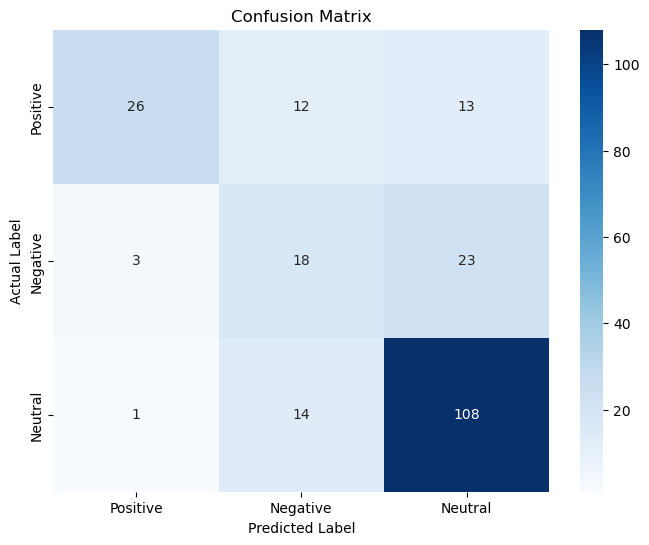

In [133]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_pysentimiento, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix1.png', dpi=300, bbox_inches='tight')

plt.show()

Recall: out of all the sentences that the model predicted, 76% match the test set. F1 shows that the model did a OK job (77%) of predicting the sentiment. Precision - measure how many of the positive predictions made are correct, recall - how many of the positive cases the classifier correctly predicred over all the pos cases - https://www.statology.org/sklearn-classification-report/, https://stephenallwright.com/interpret-f1-score/, https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec


In [85]:
confusion_matrix(sentiment_annotation_list, sentiment_py_list)


array([[ 26,  12,  13],
       [  3,  18,  23],
       [  1,  14, 108]], dtype=int64)

## Corrected lexicon sentiment accuracy

In [86]:
accuracy_score(sentiment_annotation_list,corr_lexicon_sent_score_list)

0.481651376146789

In [87]:
print(classification_report(sentiment_annotation_list, corr_lexicon_sent_score_list))


              precision    recall  f1-score   support

           1       0.37      0.76      0.50        51
           2       0.27      0.32      0.29        44
           3       0.87      0.42      0.57       123

    accuracy                           0.48       218
   macro avg       0.50      0.50      0.45       218
weighted avg       0.63      0.48      0.50       218



In [88]:
import seaborn as sns


In [89]:
lexicon_matrix = confusion_matrix(sentiment_annotation_list, sentiment_py_list)



In [124]:
cm_corrected = confusion_matrix(sentiment_annotation_list, corr_lexicon_sent_score_list)

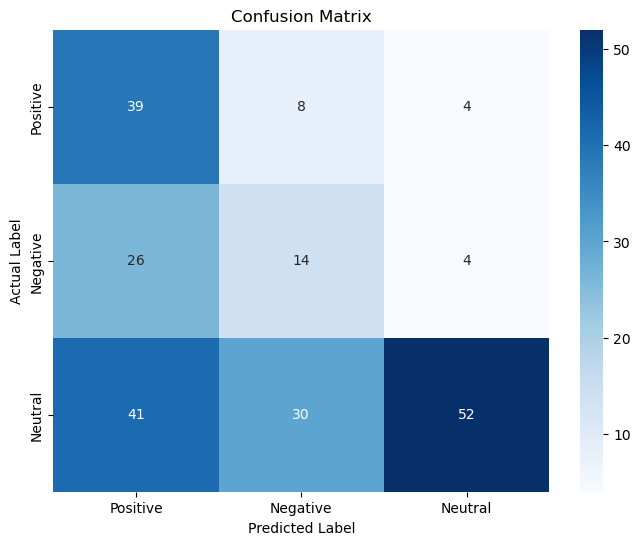

In [132]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_corrected, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix2.png', dpi=300, bbox_inches='tight')

plt.show()

# Manual lexicon sentiment accuracy

In [90]:
accuracy_score(sentiment_annotation_list,manual_lexicon_sent_score_list)

0.47706422018348627

In [91]:
print(classification_report(sentiment_annotation_list, manual_lexicon_sent_score_list))


              precision    recall  f1-score   support

           1       0.37      0.76      0.50        51
           2       0.26      0.32      0.29        44
           3       0.86      0.41      0.56       123

    accuracy                           0.48       218
   macro avg       0.50      0.50      0.45       218
weighted avg       0.63      0.48      0.49       218



In [92]:
confusion_matrix(sentiment_annotation_list, manual_lexicon_sent_score_list)


array([[39,  8,  4],
       [26, 14,  4],
       [41, 31, 51]], dtype=int64)

In [119]:
cm = confusion_matrix(sentiment_annotation_list, manual_lexicon_sent_score_list)


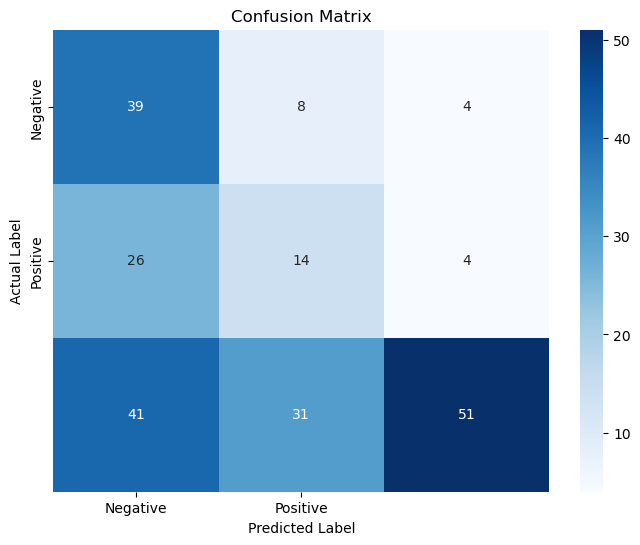

In [120]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


## Computational lexicon sentiment accuracy

In [93]:
accuracy_score(sentiment_annotation_list,computational_lexicon_sent_score_list)

0.44036697247706424

In [94]:
print(classification_report(sentiment_annotation_list, computational_lexicon_sent_score_list))

              precision    recall  f1-score   support

           1       0.35      0.76      0.48        51
           2       0.25      0.30      0.27        44
           3       0.85      0.36      0.50       123

    accuracy                           0.44       218
   macro avg       0.48      0.47      0.42       218
weighted avg       0.61      0.44      0.45       218



In [95]:
confusion_matrix(sentiment_annotation_list, computational_lexicon_sent_score_list)


array([[39,  8,  4],
       [27, 13,  4],
       [47, 32, 44]], dtype=int64)

# Emotion lexicon evaluation

In [96]:
df['emotion_annotation'] = df['emotion_annotation'].str.strip()


In [97]:
df_emotion = df[df["emotion_annotation"] != 'no_agreement']


In [98]:
df_emotion = df_emotion[df_emotion["emotion_annotation"] != 'anticipation']


In [99]:
df_emotion = df_emotion[df_emotion["emotion_annotation"] != 'trust']


In [100]:
len(df_emotion)

53

In [101]:
df_emotion

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,nf_sentiment_lexicon_corrected,lexicon_emotion,manual_lexicon_sent_score,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py,emotion_py,GPT
103,G01Q05,"Su tierno corazon, su espiritu admirable, su m...",POS,joy,FP,1761-09-26_El-Duende-especulativo-sobre-la-v...,"AnalyzerOutput(output=POS, probas={POS: 0.922,...","AnalyzerOutput(output=joy, probas={joy: 0.936,...",0.714286,0.714286,0.714286,joy,POS,POS,POS,POS,joy,POS
113,G01Q11,"Huid, Señora, de éstas, y preferid à su comuni...",NEG,fear,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.807,...","AnalyzerOutput(output=others, probas={others: ...",-1.000000,-1.000000,-1.000000,others,NEG,NEG,NEG,NEG,others,no_agreement
116,G01Q14,"Una muger hermosa, y entendida nos convence ca...",POS,surprise,SP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallad...,"AnalyzerOutput(output=POS, probas={POS: 0.900,...","AnalyzerOutput(output=joy, probas={joy: 0.493,...",1.000000,1.000000,1.000000,others,POS,POS,POS,POS,joy,no_agreement
117,G01Q56,"Semejantes documentos, apenas se aprenderán en...",POS,no emotion,S,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...,"AnalyzerOutput(output=NEG, probas={NEG: 0.670,...","AnalyzerOutput(output=others, probas={others: ...",0.000000,0.000000,0.000000,others,NEU,NEU,NEU,NEG,others,no_agreement
118,G01Q57,"Pero pocas Damas tengo báxo mi direccion, que ...",POS,joy,S,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...,"AnalyzerOutput(output=NEG, probas={NEG: 0.971,...","AnalyzerOutput(output=others, probas={others: ...",-1.000000,-1.000000,-1.000000,joy,NEG,NEG,NEG,NEG,others,no_agreement
119,G01Q15,Esta parte es la mas dificultosa de todo el ex...,NEU,no emotion,S,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallad...,"AnalyzerOutput(output=NEG, probas={NEG: 0.885,...","AnalyzerOutput(output=others, probas={others: ...",0.000000,0.000000,0.000000,others,NEU,NEU,NEU,NEG,others,no_agreement
123,G01Q17,"Las quisieron virtuosas, y las tienen virtuosa...",POS,joy,EX,1763_La-Pensadora-Gaditana_Beatriz-Cienfuegos...,"AnalyzerOutput(output=POS, probas={POS: 0.664,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,1.000000,joy,POS,POS,POS,POS,others,POS
124,G01Q61,"El de la izquierda encerraba imprecaciones, ju...",NEG,no emotion,TR,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-2_Nr-0...,"AnalyzerOutput(output=NEG, probas={NEG: 0.738,...","AnalyzerOutput(output=fear, probas={fear: 0.56...",0.000000,0.000000,0.000000,others,NEU,NEU,NEU,NEG,fear,NEG
125,G01Q62,Quanto mas lo miraba tanto mas me parecia habe...,NEU,surprise,TR,1788_El-Filósofo-á-la-Moda_Anónimo_Vol-2_Nr-0...,"AnalyzerOutput(output=NEG, probas={NEG: 0.593,...","AnalyzerOutput(output=sadness, probas={sadness...",1.000000,1.000000,1.000000,others,POS,POS,POS,NEG,sadness,NEU
126,G01Q18,"Finalmente, era lo mas recóndito de él, y con ...",NEG,surprise,FP,1763_La-Pensadora-Gaditana_Beatriz-Cienfuegos...,"AnalyzerOutput(output=NEU, probas={NEU: 0.547,...","AnalyzerOutput(output=others, probas={others: ...",-1.000000,0.000000,-1.000000,others,NEG,NEU,NEG,NEU,others,NEU


joy - 1
sadness - 2
anger - 3
disgust - 4
surprise - 5
fear - 6 
no_emotion(others) - 7

In [102]:
df_emotion['emotion_annotation_list'] = df_emotion['emotion_annotation'].replace(['joy','sadness','anger','disgust','surprise','fear','no emotion'],['1','2','3','4','5','6','7'])


In [103]:
emotion_annotation_list = df_emotion['emotion_annotation_list'].tolist()
print(emotion_annotation_list)

['1', '6', '5', '7', '1', '7', '1', '7', '5', '5', '1', '3', '7', '1', '1', '3', '7', '7', '7', '7', '7', '3', '2', '1', '7', '1', '3', '2', '7', '7', '7', '7', '7', '3', '2', '2', '2', '7', '7', '7', '7', '1', '7', '2', '7', '2', '1', '2', '7', '7', '7', '7', '7']


In [104]:
df_emotion['emotion_py_list'] = df_emotion['emotion_py'].replace(['joy','sadness','anger','disgust','surprise','fear','others'],['1','2','3','4','5','6','7'])


In [105]:
emotion_py_list = df_emotion['emotion_py_list'].tolist()
print(emotion_py_list)

['1', '7', '1', '7', '7', '7', '7', '6', '2', '7', '1', '3', '7', '1', '7', '2', '7', '7', '7', '7', '7', '3', '7', '1', '1', '7', '3', '7', '3', '7', '7', '7', '7', '3', '2', '3', '3', '3', '3', '3', '3', '7', '7', '2', '7', '2', '7', '7', '7', '7', '3', '2', '7']


In [106]:
df_emotion['emotion_lexicon_list'] = df_emotion['lexicon_emotion'].replace(['joy','sadness','anger','disgust','surprise','fear','others'],['1','2','3','4','5','6','7'])


In [107]:
emotion_lexicon_list = df_emotion['emotion_lexicon_list'].tolist()
print(emotion_lexicon_list)

['1', '7', '7', '7', '1', '7', '1', '7', '7', '7', '1', '7', '7', '1', '7', '6', '1', '1', '1', '7', '1', '1', '2', '1', '7', '7', '3', '6', '7', '7', '1', '1', '7', '7', '2', '2', '1', '3', '1', '1', '1', '3', '1', '1', '7', '1', '7', '7', '7', '2', '2', '3', '1']


# Emotion Lexicon accuracy

In [108]:
accuracy_score(emotion_annotation_list,emotion_lexicon_list)

0.39622641509433965

In [109]:
print(classification_report(emotion_annotation_list,emotion_lexicon_list))

              precision    recall  f1-score   support

           1       0.29      0.60      0.39        10
           2       0.60      0.38      0.46         8
           3       0.25      0.20      0.22         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.52      0.42      0.47        26

    accuracy                           0.40        53
   macro avg       0.28      0.27      0.26        53
weighted avg       0.43      0.40      0.39        53



C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Pysentimiento emotion accuracy

In [110]:
accuracy_score(emotion_annotation_list,emotion_py_list)

0.5283018867924528

In [111]:
print(classification_report(emotion_annotation_list,emotion_py_list))

              precision    recall  f1-score   support

           1       0.67      0.40      0.50        10
           2       0.50      0.38      0.43         8
           3       0.33      0.80      0.47         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.61      0.65      0.63        26

    accuracy                           0.53        53
   macro avg       0.35      0.37      0.34        53
weighted avg       0.53      0.53      0.51        53



C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Saving the df

# GPT sentiment accuracy

In [112]:
df_accuracy_gpt = df_sentiment[df_sentiment["GPT"] != 'no_agreement']


In [113]:
df_accuracy_gpt

,question_code,sentence,polarity_annotation,emotion_annotation,narrative_form,periodical_name,sentiment_pysentimiento,emotion_pysentimiento,nf_sentiment_lexicon_dispecs,nf_sentiment_lexicon_computational,...,comp_lexicon_sent_score,corr_lexicon_sent_score,sentiment_py,emotion_py,GPT,sentiment_annotation_list,sentiment_py_list,corr_lexicon_sent_score_list,manual_lexicon_sent_score_list,computational_lexicon_sent_score_list
0,G00Q136,"Miralos sin humanidad, y como esclavos, y ello...",NEG,no_agreement,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.887,...","AnalyzerOutput(output=anger, probas={anger: 0....",0.000000,0.000000,...,NEU,NEU,NEG,anger,NEG,3,3,2,2,2
1,G00Q138,No es tan facil determinar por dónde se ha de ...,NEU,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.585,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,...,POS,POS,NEG,others,NEU,2,3,1,1,1
2,G00Q139,"Tù debes acordarte de la ternura, con que se p...",POS,no_agreement,LB,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.804,...","AnalyzerOutput(output=joy, probas={joy: 0.552,...",1.000000,1.000000,...,POS,POS,POS,joy,POS,1,1,1,1,1
3,G00Q140,"Alli estarà mas tranquilo, y podrà vivir à su ...",POS,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=POS, probas={POS: 0.672,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,...,POS,POS,POS,others,POS,1,1,1,1,1
4,G00Q141,Confiesso à Vm. que yá no puedo sufrir la vida...,NEG,no_agreement,SP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.717,...","AnalyzerOutput(output=sadness, probas={sadness...",-0.333333,0.333333,...,POS,NEG,NEG,sadness,NEG,3,3,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,G00Q131,Es un Fenix entre los hombres.,POS,joy,FP,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEU, probas={NEU: 0.514,...","AnalyzerOutput(output=others, probas={others: ...",0.000000,0.000000,...,NEU,NEU,NEU,others,POS,1,2,2,2,2
220,G00Q133,"Pero todo esto es inutil, y èl ha hallado el m...",NEG,no_agreement,D,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.962,...","AnalyzerOutput(output=anger, probas={anger: 0....",-0.600000,-0.600000,...,NEG,NEG,NEG,anger,NEG,3,3,3,3,3
221,G00Q134,"Conociò su yerro, y procurò enmendarlo escribi...",NEG,sadness,EX,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEU, probas={NEU: 0.493,...","AnalyzerOutput(output=others, probas={others: ...",-1.000000,-1.000000,...,NEG,NEG,NEU,others,NEG,3,2,3,3,3
222,G00Q135,El modo de quedar ayrosos les es muy facil.,NEG,no_agreement,EX,1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...,"AnalyzerOutput(output=NEG, probas={NEG: 0.838,...","AnalyzerOutput(output=others, probas={others: ...",1.000000,1.000000,...,POS,POS,NEG,others,POS,3,3,1,1,1


In [114]:
df_accuracy_gpt['GPT'] = df_accuracy_gpt['GPT'].replace(['POS','NEG','NEU'],['1','3','2'])


C:\Users\krusic\AppData\Local\Temp\ipykernel_32708\3167641142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_accuracy_gpt['GPT'] = df_accuracy_gpt['GPT'].replace(['POS','NEG','NEU'],['1','3','2'])


In [115]:
accuracy_gpt_list = df_accuracy_gpt['GPT'].tolist()
print(accuracy_gpt_list)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '2', '3', '3', '2', '3', '3', '3', '3', '2', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '3', '3', '3', '2', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '2', '3', '3', '1', '3', '2', '3', '3', '1', '1', '3', '3', '2', '3', '3', '3', '3', '3', '2', '2', '3', '3', '3', '1', '1', '1', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '2', '2', '1', '3', '2', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '1', '3', '2', '2', '1', '1', '3', '2', '2', '3', '2', '1', '2', '3', '2', '2', '2', '2', '2', '2', '2', '3', '2', '3', '3', '1', '3', '3', '2', '1', '3', '3', '2', '3', '3', '3', '2', '2', '2', '2', '3', '2', '1', '3', '2', '3', '2', '3', '3', '2', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '1', '1', '3', '1', '3', '3', '3', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '3', '2', '3', '1', '3', '3', '1', '2']

In [116]:
sentiment_annotation_list_GPT = df_accuracy_gpt['sentiment_annotation_list'].tolist()
print(sentiment_annotation_list_GPT)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '1', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '1', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '3', '3', '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '1', '3', '3', '3', '3', '3', '3', '3', '2', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '1', '3', '1', '3', '3', '2', '3', '2', '3', '2', '3', '3', '1', '3', '3', '3', '3', '2', '3', '1', '3', '3', '3', '3']

In [117]:
accuracy_score(accuracy_gpt_list,sentiment_annotation_list_GPT)

0.83

In [118]:
print(classification_report(accuracy_gpt_list,sentiment_annotation_list_GPT))

              precision    recall  f1-score   support

           1       0.71      0.82      0.76        39
           2       0.78      0.58      0.67        53
           3       0.90      0.95      0.92       108

    accuracy                           0.83       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.83      0.83      0.82       200



In [134]:
cm_gpt = confusion_matrix(accuracy_gpt_list,sentiment_annotation_list_GPT)

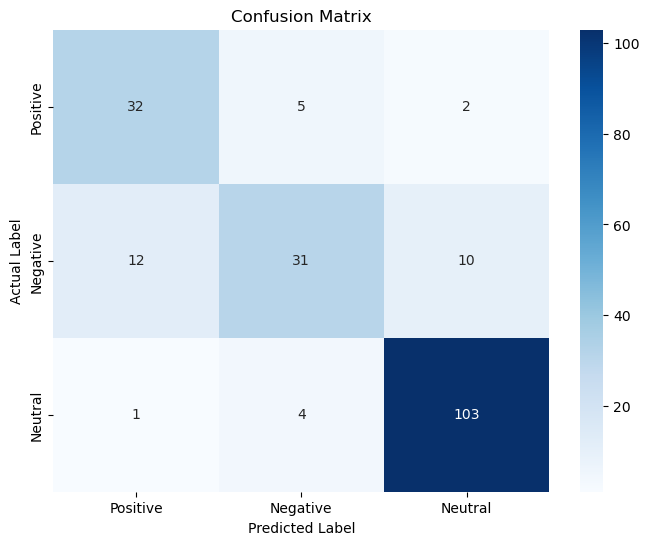

In [137]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gpt, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix3.png', dpi=300, bbox_inches='tight')
plt.show()
